<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

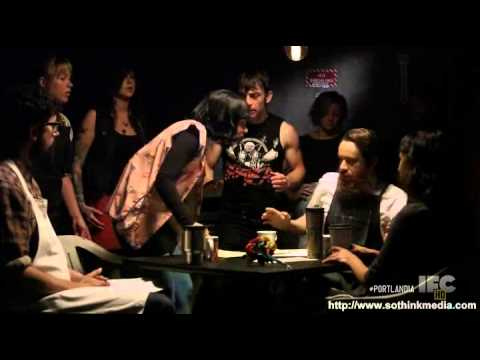

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Raymond\\Documents\\GitHub\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Start here 

shops['coffee_shop_name'] = shops['coffee_shop_name'].apply(lambda x: x.lower())
shops['coffee_shop_name'].value_counts()

epoch coffee                            400
halcyon                                 300
the factory - cafe with a soul          244
houndstooth coffee                      200
venezia italian gelato                  200
                                       ... 
lucky lab coffee                         25
sister coffee                            17
kowabunga coffee                         16
the marvelous vintage tea party co.      10
lola savannah coffee downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [11]:
# Checking for null values

print("Coffee shop name nulls:", shops['coffee_shop_name'].isnull().sum())
print("Full review text:", shops['full_review_text'].isnull().sum())
print("Star rating:", shops['star_rating'].isnull().sum())

Coffee shop name nulls: 0
Full review text: 0
Star rating: 0


In [12]:
# Imports

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [16]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [17]:
shops.shape

(7616, 3)

In [18]:
shops['star_rating'].value_counts(normalize=True)[:50]

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [19]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z]', ' ', text)
    tokens = tokens.lower().split()
    tokens = [x.strip(' ') for x in tokens]
    
    return tokens

In [20]:
shops['star_rating'].value_counts(normalize=True)[:50]

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [21]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [22]:
shops['tokens'].head()

0    [check, in, love, love, loved, the, atmosphere...
1    [listed, in, date, night, austin, ambiance, in...
2    [check, in, listed, in, brunch, spots, i, love...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [check, in, they, are, located, within, the, n...
Name: tokens, dtype: object

In [23]:
shops[['star_rating', 'tokens']][:10]

,star_rating,tokens
0,5.0 star rating,"[check, in, love, love, loved, the, atmosphere..."
1,4.0 star rating,"[listed, in, date, night, austin, ambiance, in..."
2,4.0 star rating,"[check, in, listed, in, brunch, spots, i, love..."
3,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin..."
4,4.0 star rating,"[check, in, they, are, located, within, the, n..."
5,4.0 star rating,"[check, in, very, cute, cafe, i, think, from, ..."
6,4.0 star rating,"[check, ins, listed, in, nuptial, coffee, blis..."
7,5.0 star rating,"[check, ins, love, this, place, stars, for, cl..."
8,3.0 star rating,"[check, in, ok, let, s, try, this, approach, p..."
9,5.0 star rating,"[check, ins, this, place, has, been, shown, on..."


In [24]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[check, in, love, love, loved, the, atmosphere..."
1,the factory - cafe with a soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[listed, in, date, night, austin, ambiance, in..."
2,the factory - cafe with a soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[check, in, listed, in, brunch, spots, i, love..."
3,the factory - cafe with a soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[very, cool, decor, good, drinks, nice, seatin..."
4,the factory - cafe with a soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[check, in, they, are, located, within, the, n..."


In [25]:
shops2 = shops[shops.star_rating.str.contains('5.0', case=False)]
shops3 = shops[shops.star_rating.str.contains('1.0', case=False)]

# created new dataframes using ratings with 5 star and 1 star

In [26]:
shops2.head()

# double checked to make sure it returned values

,coffee_shop_name,full_review_text,star_rating,tokens
0,the factory - cafe with a soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[check, in, love, love, loved, the, atmosphere..."
7,the factory - cafe with a soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating,"[check, ins, love, this, place, stars, for, cl..."
9,the factory - cafe with a soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating,"[check, ins, this, place, has, been, shown, on..."
13,the factory - cafe with a soul,12/5/2016 This is such a cute little cafe! I'...,5.0 star rating,"[this, is, such, a, cute, little, cafe, i, ve,..."
14,the factory - cafe with a soul,11/13/2016 Beautiful eccentric coffee shop wi...,5.0 star rating,"[beautiful, eccentric, coffee, shop, with, a, ..."


In [27]:
shops_goodbad = pd.concat([shops2,shops3])

# concatenated the dfs into a single dataframe

In [28]:
shops_goodbad['star_rating'].value_counts()

# double checked value counts to match with previous dataframe

 5.0 star rating     3780
 1.0 star rating      278
Name: star_rating, dtype: int64

In [29]:
word_counts = Counter()
shops2['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(30)

# top 3- words for shops with 5 star rating

[('the', 15118),
 ('and', 12749),
 ('i', 10308),
 ('a', 9471),
 ('to', 7166),
 ('of', 5617),
 ('is', 5614),
 ('in', 5255),
 ('it', 5217),
 ('coffee', 5064),
 ('for', 3590),
 ('was', 3485),
 ('you', 3264),
 ('this', 3174),
 ('they', 3104),
 ('s', 2948),
 ('my', 2845),
 ('with', 2831),
 ('that', 2641),
 ('place', 2532),
 ('have', 2342),
 ('on', 2242),
 ('but', 2233),
 ('great', 2184),
 ('are', 2119),
 ('so', 2107),
 ('t', 1842),
 ('their', 1663),
 ('good', 1547),
 ('check', 1539)]

In [30]:
word_counts = Counter()
shops3['tokens'].apply(lambda x: word_counts.update(x))
word_counts.most_common(30)

# the top 30 words for shops with 1 stars

[('the', 1443),
 ('i', 1366),
 ('and', 1101),
 ('to', 907),
 ('a', 889),
 ('was', 606),
 ('it', 559),
 ('of', 481),
 ('in', 430),
 ('for', 397),
 ('that', 373),
 ('my', 368),
 ('is', 345),
 ('t', 331),
 ('this', 324),
 ('coffee', 314),
 ('you', 288),
 ('not', 286),
 ('they', 249),
 ('with', 248),
 ('but', 224),
 ('at', 205),
 ('on', 204),
 ('place', 200),
 ('s', 187),
 ('me', 184),
 ('so', 182),
 ('have', 178),
 ('we', 172),
 ('there', 170)]

In [31]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [32]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'place', "it's", 'food' ,'time', 'order', 'asked', "i've","1","i'm","-","it.","customer"])

In [33]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [34]:
tokens = []

for doc in tokenizer.pipe(shops2['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops2['tokens'] = tokens

E:\Anaconda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [35]:
tokens = []

for doc in tokenizer.pipe(shops3['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops3['tokens'] = tokens

E:\Anaconda\envs\u4-s1-nlp\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [36]:
wc = count(shops2['tokens'])
wc.head(10)

# well couldn't seem to get that space out of there with the tokenizer

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8,,3780,10160,1.0,0.057442,0.057442,1.000000
370,great,1391,1865,2.0,0.010544,0.067986,0.367989
11,love,892,1145,3.0,0.006473,0.074459,0.235979
145,good,878,1124,4.0,0.006355,0.080814,0.232275
133,like,797,1102,5.0,0.006230,0.087045,0.210847
47,best,713,817,6.0,0.004619,0.091664,0.188624
6,check-in,803,804,7.0,0.004546,0.096209,0.212434
372,friendly,666,684,8.0,0.003867,0.100076,0.176190
838,austin,555,657,9.0,0.003714,0.103791,0.146825
224,little,538,624,10.0,0.003528,0.107319,0.142328


In [37]:
wc = count(shops3['tokens'])
wc.head(10)

# odd how both 1 star and 5 star are quite similar

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
65,,278,880,1.0,0.053111,0.053111,1.000000
144,like,100,163,2.0,0.009838,0.062949,0.359712
13,service,68,86,3.0,0.005190,0.068139,0.244604
50,don't,68,80,4.0,0.004828,0.072968,0.244604
59,good,63,75,5.0,0.004527,0.077494,0.226619
422,got,56,65,6.0,0.003923,0.081417,0.201439
240,people,46,63,7.0,0.003802,0.085219,0.165468
30,drink,35,62,8.0,0.003742,0.088961,0.125899
143,ordered,50,59,9.0,0.003561,0.092522,0.179856
91,going,43,58,10.0,0.003501,0.096023,0.154676


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


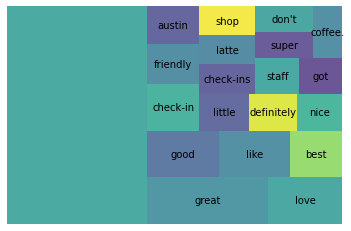

In [38]:
wc = count(shops2['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

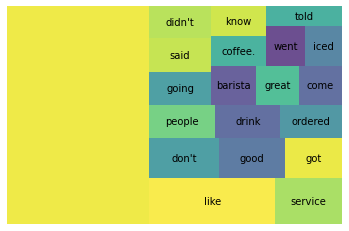

In [39]:
wc = count(shops3['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

